In [26]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import string
import unidecode

In [ ]:
notes_df = pd.read_csv('note classification\\Notes.csv')

def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text
def remove_numbers(text): 
    result = re.sub(r'\d+', '', text) 
    return result
def remove_slash_with_space(text): 
    return text.replace('\\', " ")
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 
def text_lowercase(text): 
    return text.lower()     
def remove_whitespace(text): 
    return  " ".join(text.split()) 
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return ' '.join(filtered_text)
def stem_words(text): 
    stemmer = PorterStemmer() 
    word_tokens = word_tokenize(text) 
    stems = [stemmer.stem(word) for word in word_tokens] 
    return ' '.join(stems)
def lemmatize_words(text): 
    lemmatizer = WordNetLemmatizer() 
    word_tokens = word_tokenize(text) 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas) 


def perform_preprocessing(text):
    text = remove_accented_chars(text)
    text = remove_numbers(text)
    text = remove_stopwords(text)
    text = text_lowercase(text)
    text = remove_slash_with_space(text)
    text = remove_punctuation(text)
    text = stem_words(text)
    text = lemmatize_words(text)
    text = remove_whitespace(text)
    return text

# Apply the preprocessing function to each segment
notes_df['Segment1_Notes'] = notes_df['Segment1_Notes'].apply(perform_preprocessing)
notes_df['Segment2_Notes'] = notes_df['Segment2_Notes'].apply(perform_preprocessing)
notes_df['Segment3_Notes'] = notes_df['Segment3_Notes'].apply(perform_preprocessing)
notes_df['Segment4_Notes'] = notes_df['Segment4_Notes'].apply(perform_preprocessing)

notes_df.head()

,Experiment,Topic,ID,Segment1_Notes,Segment2_Notes,Segment3_Notes,Segment4_Notes
0,1,Physics,6266293,lasersinv earli th centuri einsteindiscov quan...,make laser part load atom w electron solid liq...,dif type l lightenergi exist quantum smallest ...,goldfing goldfing use laser slice bond half cu...
1,1,Physics,6416079,laser invent earli th centuri einstein discov ...,how make laser you need two basic part load at...,what differ type laser light whi make singl co...,laser use carbon dioxid laser industri cut too...
2,1,Physics,6265686,maser microwav radiowav invent charl town arth...,make laser need load atom electron someth stim...,differ type laser light quantum smallest quant...,laser use carbon dioxid laser use industri cut...
3,1,Physics,6260581,histori laser earli einstein quantum theori st...,make laser beam load atom w electron stimul me...,type laser light solid dope introduc impur hig...,jame bond laser goldfing use laser cut someon ...
4,1,Physics,6269286,laser develop laser maser like laser invis mas...,red laser make rubi crystal flash tube wrap ar...,energi exist quantam laser light monochromat c...,laser precis easi use cut use industri cut las...


In [34]:
train_df = pd.read_csv('note classification\\train.csv')

train_df['IdeaUnit'] = train_df['IdeaUnit'].apply(perform_preprocessing)

train_df.head()

,Topic,ID,Segment,IdeaUnit,label
0,ComputerScience,6260226,1,declar knowledg factual statement,1
1,ComputerScience,6260226,1,imper knowledg solv problem accomplish task,1
2,ComputerScience,6260226,1,algorithm instruct step complet specif order,1
3,ComputerScience,6260226,1,algorithm outlin begin middl end,0
4,ComputerScience,6260226,1,algorithm contain loop instruct tell program r...,1


In [50]:
similarity_df = pd.DataFrame(columns=['Similarity', 'Label'])

for index, row in train_df.iterrows():
    print(row['Topic'], row['ID'], row['IdeaUnit']) 
    
    matching_row = notes_df[(notes_df['Topic'] == row['Topic']) & (notes_df['ID'] == row['ID'])]
    if not matching_row.empty:
       
        # print("Matching row found in notes_df:")
        # print(matching_row[['Segment1_Notes', 'Segment2_Notes', 'Segment3_Notes', 'Segment4_Notes']])
        
        # Print the first 5 rows of the matching row
        # for col in ['Segment1_Notes', 'Segment2_Notes', 'Segment3_Notes', 'Segment4_Notes']:
        #     print(f"{col}: {matching_row[col].values[0]}")
            
        segment_idea = matching_row[f'Segment{row["Segment"]}_Notes'].values[0]
        student_note = row['IdeaUnit']
        print("Segment Idea:", segment_idea)
        print("Student Note:", student_note)
        
        # Find the similarity between the two segments
        segment_words = set(segment_idea.split())
        student_words = set(student_note.split())
        
        common_words = segment_words.intersection(student_words)
        
        similarity = len(common_words) / (len(segment_words) + len(student_words) - len(common_words)) if (len(segment_words) + len(student_words) - len(common_words)) > 0 else 0
        print("Similarity:", similarity)
        
        # Store the similarity and label in the similarity_df
        similarity_df = similarity_df._append({'Similarity': similarity, 'Label': row['label']}, ignore_index=True)
       
    else:
        print("No matching row found for index:", index)  

ComputerScience 6260226 declar knowledg factual statement
Segment Idea: basic of comput scienc declar knowledg factual statement impar knowledg howto statement express algorithm step exact order perform comput algorithm contain loop tell program start repeat process termin code must includedinfinit loop miss termin code program run forev talk german dont know anyth fix program machin execut algorithm store program comput oper prov
Student Note: declar knowledg factual statement
Similarity: 0.0975609756097561
ComputerScience 6260226 imper knowledg solv problem accomplish task
Segment Idea: basic of comput scienc declar knowledg factual statement impar knowledg howto statement express algorithm step exact order perform comput algorithm contain loop tell program start repeat process termin code must includedinfinit loop miss termin code program run forev talk german dont know anyth fix program machin execut algorithm store program comput oper prov
Student Note: imper knowledg solv problem

C:\Users\rohai\AppData\Local\Temp\ipykernel_36000\1666181669.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  similarity_df = similarity_df._append({'Similarity': similarity, 'Label': row['label']}, ignore_index=True)


In [51]:
similarity_df.head()

,Similarity,Label
0,0.097561,1.0
1,0.021739,1.0
2,0.068182,1.0
3,0.022222,0.0
4,0.142857,1.0


c:\Users\rohai\anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rohai\anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rohai\anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roha

Best Threshold: 0.06
Best Accuracy: 0.5961
Best F1 Score: 0.5942
Best Precision: 0.6006
Best Recall: 0.5961


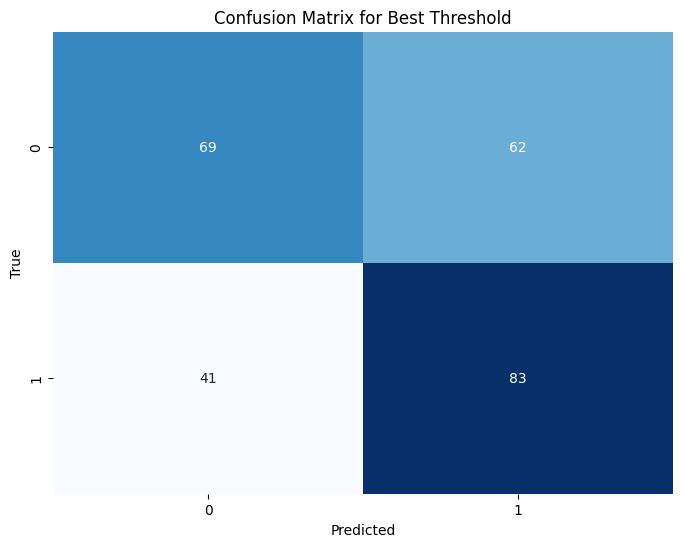

In [59]:
# find the best threshold for the similarity score from the similarity_df by iterating through different thresholds
thresholds = [i * 0.01 for i in range(101)]
best_threshold = None
best_accuracy = 0.0
best_f1_score = 0.0
best_precision = 0.0
best_recall = 0.0



from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    
    return accuracy, f1, precision, recall

# Iterate through different thresholds to find the best one
for threshold in thresholds:
    # Create a binary prediction based on the threshold
    similarity_df['Predicted'] = (similarity_df['Similarity'] >= threshold).astype(int)
    
    # Evaluate the model
    accuracy, f1, precision, recall = evaluate_model(similarity_df['Label'], similarity_df['Predicted'])
    
    # Check if this is the best threshold so far
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        
# Print the best threshold and its corresponding metrics
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best F1 Score: {best_f1_score:.4f}")
print(f"Best Precision: {best_precision:.4f}")
print(f"Best Recall: {best_recall:.4f}")

# Plot the confusion matrix for the best threshold
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Create a binary prediction based on the best threshold
similarity_df['Predicted'] = (similarity_df['Similarity'] >= best_threshold).astype(int)

# Plot the confusion matrix for the best threshold
plot_confusion_matrix(similarity_df['Label'], similarity_df['Predicted'], title='Confusion Matrix for Best Threshold')


In [74]:
test_df = pd.read_csv('note classification\\test.csv', encoding='cp1252')

test_df = test_df.dropna(subset=['label'])

test_df['IdeaUnit'] = test_df['IdeaUnit'].apply(perform_preprocessing)

test_df.head()

,Experiment,Topic,ID,Segment,IdeaUnit,label
0,2,ComputerScience,6260230,1,declar knowledg factual statement,1.0
1,2,ComputerScience,6260230,1,imper knowledg solv problem accomplish task,1.0
2,2,ComputerScience,6260230,1,algorithm instruct step complet specif order,0.0
3,2,ComputerScience,6260230,1,algorithm outlin begin middl end,0.0
4,2,ComputerScience,6260230,1,algorithm contain loop instruct tell program r...,1.0


In [75]:
test_preds = pd.DataFrame(columns=['Similarity', 'Label'])

for index, row in test_df.iterrows():
    # print(row['Topic'], row['ID'], row['IdeaUnit']) 
    
    matching_row = notes_df[(notes_df['Topic'] == row['Topic']) & (notes_df['ID'] == row['ID'])]
    if not matching_row.empty:
            
        segment_idea = matching_row[f'Segment{row["Segment"]}_Notes'].values[0]
        student_note = row['IdeaUnit']
        # print("Segment Idea:", segment_idea)
        # print("Student Note:", student_note)
        
        # Find the similarity between the two segments
        segment_words = set(segment_idea.split())
        student_words = set(student_note.split())
        
        common_words = segment_words.intersection(student_words)
        
        similarity = len(common_words) / (len(segment_words) + len(student_words) - len(common_words)) if (len(segment_words) + len(student_words) - len(common_words)) > 0 else 0
        # print("Similarity:", similarity)
        
        test_preds = test_preds._append({'Similarity': similarity, 'Label': row['label']}, ignore_index=True)
       
    else:
        print("No matching row found for index:", index)  

ComputerScience 6260230 declar knowledg factual statement
ComputerScience 6260230 imper knowledg solv problem accomplish task
ComputerScience 6260230 algorithm instruct step complet specif order
ComputerScience 6260230 algorithm outlin begin middl end
ComputerScience 6260230 algorithm contain loop instruct tell program repeat
ComputerScience 6260230 proper termin instruct crucial algorithm prevent infinit loop
ComputerScience 6260230 one first comput design iowa state univers atanasoff berri
ComputerScience 6260230 earli comput call fix program comput design specif problem
ComputerScience 6260230 the atanasoff berri comput abc make help drop bomb world war ii
ComputerScience 6260230 alan ture s machin build alli decod german militari messag world war ii
ComputerScience 6260230 earli comput oper execut set algorithm separ receiv oper input
ComputerScience 6260230 fix program comput limit function capabl perform predefin task
ComputerScience 6260230 the invent store program comput mark s

C:\Users\rohai\AppData\Local\Temp\ipykernel_36000\2252251756.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_preds = test_preds._append({'Similarity': similarity, 'Label': row['label']}, ignore_index=True)


ComputerScience 6335970 integ deal whole number notat int python
ComputerScience 6335970 float point deal decim notat float python
ComputerScience 6414142 declar knowledg factual statement
ComputerScience 6414142 imper knowledg solv problem accomplish task
ComputerScience 6414142 algorithm instruct step complet specif order
ComputerScience 6414142 algorithm outlin begin middl end
ComputerScience 6414142 algorithm contain loop instruct tell program repeat
ComputerScience 6414142 proper termin instruct crucial algorithm prevent infinit loop
ComputerScience 6414142 one first comput design iowa state univers atanasoff berri
ComputerScience 6414142 earli comput call fix program comput design specif problem
ComputerScience 6414142 the atanasoff berri comput abc make help drop bomb world war ii
ComputerScience 6414142 alan ture s machin build alli decod german militari messag world war ii
ComputerScience 6414142 earli comput oper execut set algorithm separ receiv oper input
ComputerScience 64

Test Accuracy: 0.5982
Test F1 Score: 0.6061
Test Precision: 0.6381
Test Recall: 0.5982


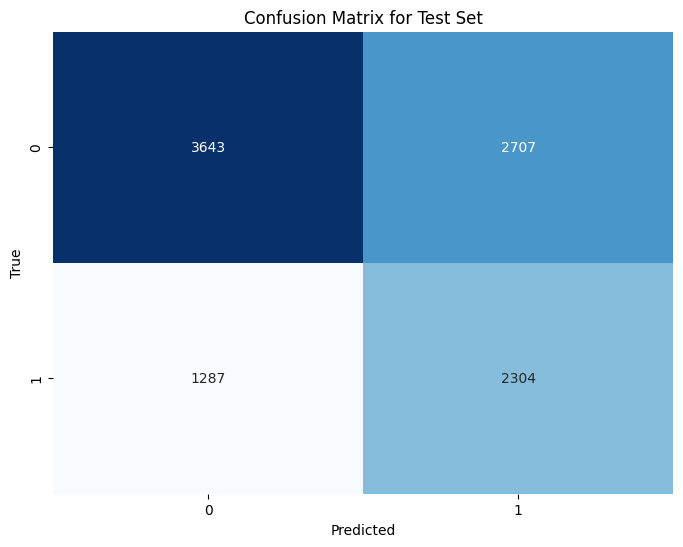

In [ ]:
preds = (test_preds['Similarity'] >= best_threshold).astype(int)

accuracy, f1, precision, recall = evaluate_model(test_preds['Label'], preds)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

plot_confusion_matrix(test_preds['Label'], preds, title='Confusion Matrix for Test Set')